In [1]:
import numpy as np
from qiskit import*
import math as m
from scipy import linalg as la
import matplotlib.pyplot as plt
import pylatexenc
from qiskit.quantum_info import*
from qiskit.visualization import*
from itertools import*
%matplotlib inline
np.set_printoptions(threshold=sys.maxsize)
np.seterr(divide = 'ignore') 
from numpy.linalg import eig
import matplotlib.pyplot as plt
import warnings

#suppress warnings
warnings.filterwarnings('ignore')


#we need this block to run the circuit
sim = Aer.get_backend('aer_simulator')
sigma = 1

In [2]:
#Listing out our parameters
c_1 = 1/(np.sqrt(2))
c_2 = c_1*1j
C2 = 1/(8*(np.pi**2)*sigma**4)
val1 = [1,-1]
def LPI(lambda_phi):
    lambda_pi = np.pi/(np.multiply(4,lambda_phi))*(2*np.pi)**(3/2)*sigma**3
    return lambda_pi

# def LPI(lambda_phi):
#     lambda_pi = 1/(np.multiply(1,lambda_phi))
#     return lambda_pi
    
lambda_phi = [i for i in range(1,106)]
lambda_pi = [LPI(lambda_phi)]

def C(lambda_pi,lambda_phi):
    C = -1j*np.multiply(lambda_phi,lambda_pi)/(2*np.sqrt((2*np.pi)**3)*sigma**3)
    return C
# def C(lambda_pi,lambda_phi):
#     C = 1
#     return C
def W(xl,xm,zl,zm,lambda_pi,lambda_phi):
    W_lm = C2*(4*np.multiply(xl,xm)*np.multiply(lambda_pi,lambda_pi)+2*np.multiply(zl,zm)*(sigma**2)*np.multiply(lambda_phi,lambda_phi)+1j*np.sqrt(2*np.pi)*sigma*np.multiply(lambda_pi,lambda_phi)*(np.multiply(xm,zl)-np.multiply(xl,zm)))
    return W_lm


In [3]:
#this block is to Establish the specific projection matrices

def Projection_z(x):
    proj_z = [x,0] if x==1 else [0,-x]
    return proj_z

def Projection_y(x):
    proj_y = [c_1*x,c_2*x] if x==1 else [-c_1*x,c_2*x]
    return proj_y

def Projection_x(x):
    proj_x = [c_1*x,c_1*x] if x==1 else [-c_1*x,c_1*x]
    return proj_x


In [4]:
#Here we will define equation 70

def rho_CB(lpi,lphi):
    rho_CB = [1/2*np.kron((np.exp(x1*z1*C(lpi,lphi))*np.exp(-x2*z2*C(lpi,lphi))*np.exp(x3*z3*C(lpi,lphi))*np.exp(-x4*z4*C(lpi,lphi))\
           *np.exp(-1*(W(x1,x2,z1,z2,lpi,lphi)+W(x1,x3,z1,z3,lpi,lphi)+W(x1,x4,z1,z4,lpi,lphi)+W(x2,x3,z2,z3,lpi,lphi)+W(x2,x4,z2,z4,lpi,lphi)+W(x3,x4,z3,z4,lpi,lphi)))\
                               *np.exp(-1/2*(W(x1,x1,z1,z1,lpi,lphi)+W(x2,x2,z2,z2,lpi,lphi)+W(x3,x3,z3,z3,lpi,lphi)+W(x4,x4,z4,z4,lpi,lphi))))\
                                   ,(np.kron((np.conj(Projection_z(k1)).T @ np.outer(Projection_z(-z1),Projection_z(-z1)) @ np.outer(Projection_x(-x1),Projection_x(-x1))@np.outer(Projection_x(x4),Projection_x(x4))@ np.outer(Projection_z(z4),Projection_z(z4)) @ Projection_z(j1))\
                                    ,np.kron(np.outer(Projection_z(-j1),Projection_z(-k1)),(np.outer((np.outer(Projection_z(-z3),Projection_z(-z3))@ np.outer(Projection_x(-x3),Projection_x(-x3)) @ Projection_y(1)), np.conj(Projection_y(1)).T @ np.outer(Projection_x(x2),Projection_x(x2)) @ np.outer(Projection_z(z2),Projection_z(z2))))))))\
                                   for x1 in val1 for z1 in val1 for x2 in val1 for z2 in val1 for x3 in val1 for z3 in val1 for x4 in val1 for z4 in val1 for j1 in val1 for k1 in val1]
    return rho_CB

def rho_B(lpi,lphi):
    rho_B = [1/2*np.kron((np.exp(x1*z1*C(lpi,lphi))*np.exp(-x2*z2*C(lpi,lphi))*np.exp(x3*z3*C(lpi,lphi))*np.exp(-x4*z4*C(lpi,lphi))\
           *np.exp(-1*(W(x1,x2,z1,z2,lpi,lphi)+W(x1,x3,z1,z3,lpi,lphi)+W(x1,x4,z1,z4,lpi,lphi)+W(x2,x3,z2,z3,lpi,lphi)+W(x2,x4,z2,z4,lpi,lphi)+W(x3,x4,z3,z4,lpi,lphi)))\
                               *np.exp(-1/2*(W(x1,x1,z1,z1,lpi,lphi)+W(x2,x2,z2,z2,lpi,lphi)+W(x3,x3,z3,z3,lpi,lphi)+W(x4,x4,z4,z4,lpi,lphi))))\
                                   ,(np.kron((np.conj(Projection_z(j1)).T @ np.outer(Projection_z(-z1),Projection_z(-z1)) @ np.outer(Projection_x(-x1),Projection_x(-x1))@np.outer(Projection_x(x4),Projection_x(x4))@ np.outer(Projection_z(z4),Projection_z(z4)) @ Projection_z(j1))\
                                    ,np.outer(np.outer(Projection_z(-z3),Projection_z(-z3))@ np.outer(Projection_x(-x3),Projection_x(-x3)) @ Projection_y(1), np.conj(Projection_y(1)).T @ np.outer(Projection_x(x2),Projection_x(x2)) @ np.outer(Projection_z(z2),Projection_z(z2))))))\
                                      for x1 in val1 for z1 in val1 for x2 in val1 for z2 in val1 for x3 in val1 for z3 in val1 for x4 in val1 for z4 in val1 for j1 in val1]
    return rho_B    

In [5]:
#This block calculates all of the density matrices from 1-105

rho_CB_List = [rho_CB(LPI(i),i) for i in range (1,106)]
rho_B_List = [rho_B(LPI(i),i) for i in range (1,106)]


In [6]:

Density_List_CB = [DensityMatrix(sum(rho_CB_List[i])) for i in range(105)]
Density_List_B = [DensityMatrix(sum(rho_B_List[i])) for i in range(105)]

display(Density_List_CB[0].draw('latex', prefix=" \\rho_{CB} = "),
        Density_List_B[0].draw('latex', prefix=" \\rho_{B} = "),
        Density_List_CB[1].draw('latex', prefix=" \\rho_{CB} = "),
        Density_List_B[1].draw('latex', prefix=" \\rho_{B} = "),
        Density_List_CB[5].draw('latex', prefix=" \\rho_{CB} = "),
        Density_List_B[5].draw('latex', prefix=" \\rho_{B} = "),
        Density_List_CB[10].draw('latex', prefix=" \\rho_{CB} = "),
        Density_List_B[10].draw('latex', prefix=" \\rho_{B} = "),
        Density_List_CB[20].draw('latex', prefix=" \\rho_{CB} = "),
        Density_List_B[20].draw('latex', prefix=" \\rho_{B} = "),
        Density_List_CB[100].draw('latex', prefix=" \\rho_{CB} = "),
        Density_List_B[100].draw('latex', prefix=" \\rho_{B} = "),
        Density_List_CB[104].draw('latex', prefix=" \\rho_{CB} = "),
        Density_List_B[104].draw('latex', prefix=" \\rho_{B} = "))


                                   

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [7]:
#Define Coherent Information and generate the list

Coherent_Information = [entropy(Density_List_B[i])-entropy(Density_List_CB[i]) for i in range(105)]


Coherent_Information_Zero = [0 if Coherent_Information[i]<0 else Coherent_Information[i] for i in range(105)]
print(Coherent_Information_Zero)

[0, 0, 0, 0, 0, 0.15613295829088836, 0.2917550653036505, 0.39990873359022394, 0.4861954926132327, 0.5555672738818618, 0.6119174581226485, 0.6581934133644158, 0.6966048069228157, 0.7288117252958876, 0.7560705462639327, 0.7793412850909839, 0.7993651841424074, 0.8167206156517323, 0.8318635133714296, 0.8451568281324495, 0.856892179488404, 0.8673059250216535, 0.8765912041005903, 0.8849070524003911, 0.8923853648082698, 0.899136262931683, 0.9052522686264849, 0.9108115758959081, 0.9158806360100897, 0.920516215143248, 0.9247670436624376, 0.9286751468949954, 0.932276925656801, 0.9356040388343286, 0.9386841283668191, 0.9415414179702036, 0.9441972101191229, 0.9466703005722127, 0.9489773257281529, 0.9511330549685174, 0.9531506377355501, 0.9550418131914773, 0.9568170888021066, 0.9584858930094273, 0.9600567062060141, 0.9615371734752141, 0.962934201942621, 0.9642540450996095, 0.9655023760587309, 0.9666843513735193, 0.9678046667876452, 0.9688676060658571, 0.9698770838679747, 0.9708366834907554, 0.97174

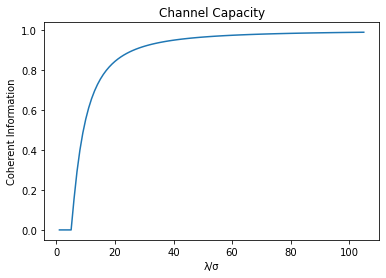

In [8]:
# plotting the points 
plt.plot(lambda_phi, Coherent_Information_Zero)
  
# naming the x axis
plt.xlabel('\u03BB/\u03C3')
# naming the y axis
plt.ylabel('Coherent Information')
  
# giving a title to my graph
plt.title('Channel Capacity')
  
# function to show the plot
plt.savefig('UDW_Channel_Capacity.pdf')